In [1]:
import numpy as np
import XNLdyn
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool

%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('default')

In [3]:

## Set up the problem
PAR = XNLdyn.XNLpars()

N_local_fluences_to_calculate = 30
N_pulse_energies = 20
Nsteps_r = 100

pulse_energy_J = 1e-9 # J

PAR.I0 =  [XNLdyn.photons_per_J(PAR.E_i[0])*pulse_energy_J,XNLdyn.photons_per_J(PAR.E_i[1])*pulse_energy_J]
PAR.I0

[7300010.613404402, 7351600.794417861]

Starting to generate lookup tables for U between -25.0 to 25.0 and R between 0.0 and 20.0
Lookup tables generated.
Saving at ./fermi_lookup_table.npz


<IPython.core.display.Javascript object>


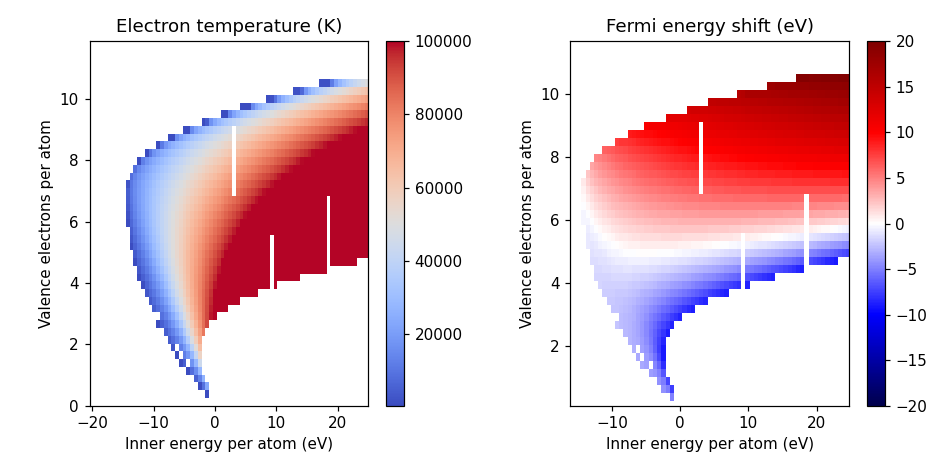

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:401: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl1 = ax1.pcolormesh(Ugrid, Rgrid, temperatures_gr, cmap=plt.cm.coolwarm, vmin = 300,vmax = 1e5,
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:411: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl2 = ax2.pcolormesh(Ugrid, Rgrid, fermi_energies_gr, cmap=plt.cm.seismic, vmin = -20, vmax = 20,


CPU times: user 1min 4s, sys: 409 ms, total: 1min 5s
Wall time: 1min 4s


In [4]:
%%time
sim = XNLdyn.XNLsim(PAR, DEBUG=True, load_tables = False)

PAR.FermiSolver.plot_lookup_tables()

In [5]:
%%time
sim_options = dict(t_span=[-40, 60],method='RK45', rtol=1e-5, atol=1e-8, plot = True, return_full_solution = True)

incident, transmitted, sol = sim.run(**sim_options)

print('Transmission: ', 100 * transmitted/incident, ' %')


-14.648825836847656 6.6099859206423615 -> 4068.623289404407 0.1610317309038436
-14.648734257034784 6.609968179209758 -> 4068.623289404407 0.1610317309038436
-14.647688324815206 6.609765554467474 -> 4068.623289404407 0.1610317309038436
-14.64712976134169 6.609657345945223 -> 4068.623289404407 0.1610317309038436
-14.644346825796584 6.609118217704428 -> 4068.623289404407 0.1610317309038436
-14.643856545182091 6.60902323737848 -> 4068.623289404407 0.1610317309038436
-14.643248064630802 6.608905358597669 -> 4068.623289404407 0.1610317309038436
-14.643250038649748 6.608905741017366 -> 4068.623289404407 0.1610317309038436
-14.634799461294685 6.607268640614334 -> 4068.623289404407 0.1610317309038436
-14.631159553605412 6.606563494198022 -> 4068.623289404407 0.1610317309038436
-14.612969648364837 6.603039628323397 -> 4068.623289404407 0.1610317309038436
-14.609376085035578 6.602343460035108 -> 4068.623289404407 0.1610317309038436
-14.605904624210837 6.601670946233947 -> 4068.623289404407 0.1610

-14.50594086388314 6.582305115018549 -> 4068.623289404407 0.1610317309038436
-14.505919144635396 6.582300800226777 -> 4068.623289404407 0.1610317309038436
-14.506010496102657 6.5823189904850565 -> 4068.623289404407 0.1610317309038436
-14.506008440723958 6.58231860059675 -> 4068.623289404407 0.1610317309038436
-14.506008700717189 6.582318665481007 -> 4068.623289404407 0.1610317309038436
-14.505997688666485 6.582316506169915 -> 4068.623289404407 0.1610317309038436
-14.50597081570401 6.582311081993156 -> 4068.623289404407 0.1610317309038436
-14.505959033738463 6.582308714762386 -> 4068.623289404407 0.1610317309038436
-14.506008269263933 6.5823186791738255 -> 4068.623289404407 0.1610317309038436
-14.506006797481886 6.582318420822082 -> 4068.623289404407 0.1610317309038436
-14.506007020410319 6.582318494134373 -> 4068.623289404407 0.1610317309038436
-14.50599680063931 6.582316470381002 -> 4068.623289404407 0.1610317309038436
-14.50597037343147 6.582310879505833 -> 4068.623289404407 0.161031

-14.50528940156545 6.582266931876318 -> 4068.623289404407 0.1610317309038436
-14.505275383414995 6.582264623625086 -> 4068.623289404407 0.1610317309038436
-14.505264764310498 6.582268908085835 -> 4068.623289404407 0.1610317309038436
-14.505236033270798 6.582266460232864 -> 4068.623289404407 0.1610317309038436
-14.505220840847356 6.582265202382828 -> 4068.623289404407 0.1610317309038436
-14.505147123382127 6.582257897604092 -> 4068.623289404407 0.1610317309038436
-14.50513916497779 6.582254525019532 -> 4068.623289404407 0.1610317309038436
-14.505123267312662 6.582252032954401 -> 4068.623289404407 0.1610317309038436
-14.50511326659329 6.582256006120716 -> 4068.623289404407 0.1610317309038436
-14.505080915846925 6.582253097145276 -> 4068.623289404407 0.1610317309038436
-14.505064014959665 6.582251601281646 -> 4068.623289404407 0.1610317309038436
-14.504981607689384 6.582243242120304 -> 4068.623289404407 0.1610317309038436
-14.504971560772812 6.582239955598731 -> 4068.623289404407 0.161031

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


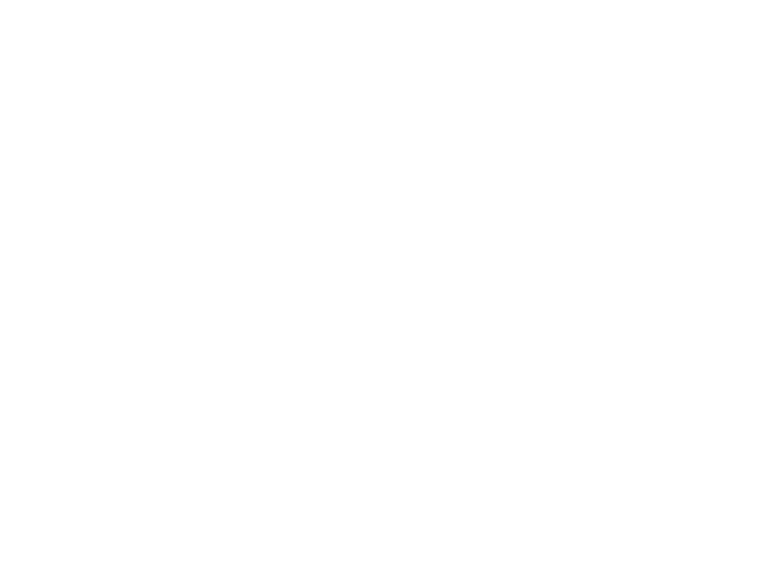

NameError: name 'sol' is not defined

In [6]:
plt.figure()
plt.pcolormesh(sol.t, PAR.E_j,sol.rho_j[0]-np.outer(PAR.rho_j_0,np.ones(sol.t.shape)))


<IPython.core.display.Javascript object>


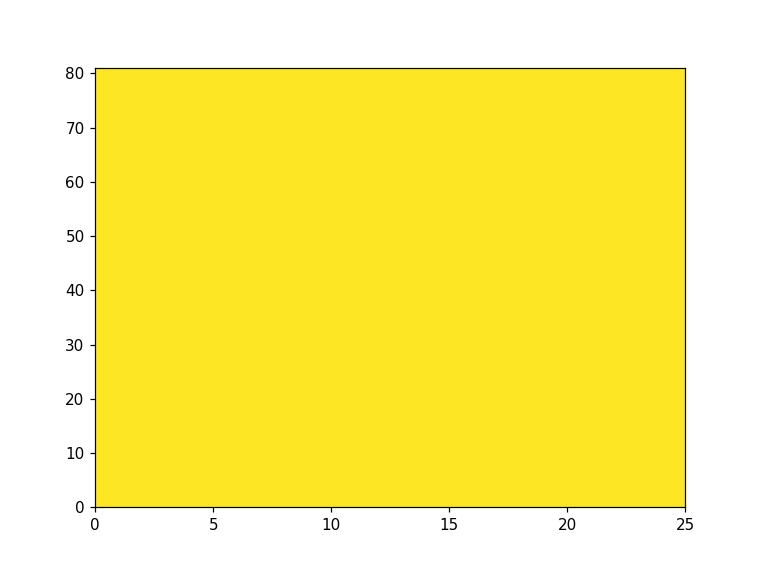

In [7]:
plt.figure()
plt.pcolormesh(sol.temperatures, vmin = 300, vmax = 500)

In [ ]:
dir(sol)

<IPython.core.display.Javascript object>


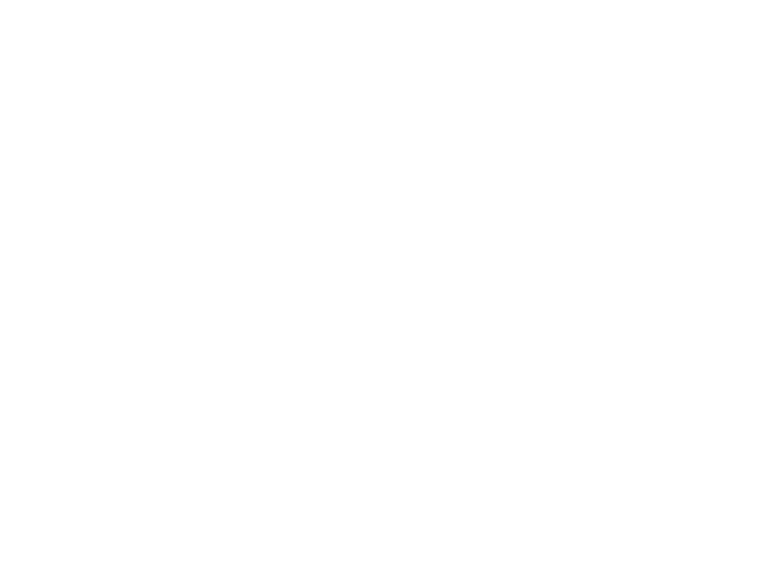

ValueError: operands could not be broadcast together with shapes (200,) (2,) 

In [8]:
t = np.linspace(-50,50,200)
plt.figure()
plt.plot(t,sim.par.pulse_profiles(t))
np.trapz(y= sim.par.pulse_profiles(t),x=t)

<IPython.core.display.Javascript object>


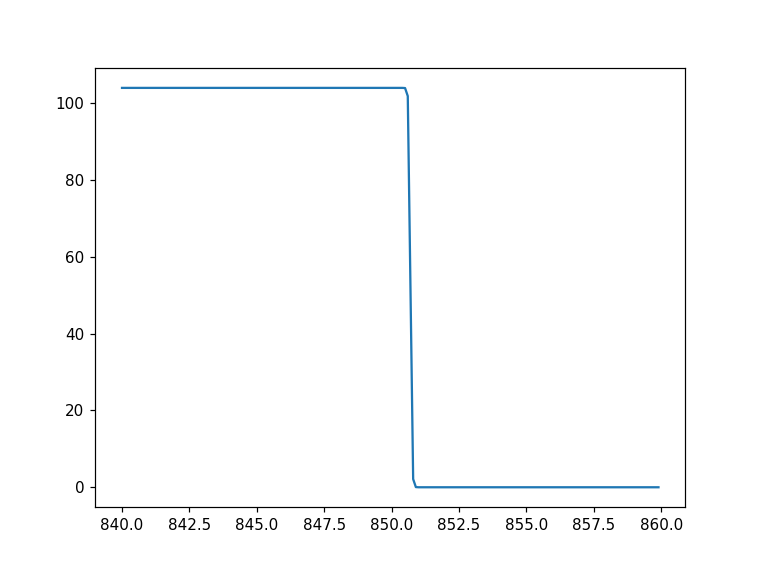

In [9]:
rho_VB  = sim.par.state_vector_0[0, 2]
T       = sim.par.state_vector_0[0, 3] /sim.par.M_VB
enax = np.arange(840, 860, 0.1)
pop =  [sim.fermi(T, rho_VB, E, sim.par.E_f) for E in enax]

plt.figure()
plt.plot(enax, pop)


In [77]:
def make_valence_energy_axis(self, N_j: int, min=-6, finemax=10, max=50):
        """
        Creates an energy axis for the valence band, namely
            self.E_j
        and its edgepoints
            self.enax_j_edges
        Energies are relative to the fermi-level. 3/4 of all points fall into the range (min, finemax)
        Makes sure that the energies E_i correspond to a point in E_j and
        drops the closest points to keep the number N_j.
        :param N_j:
        :param min:
        :param finemax:
        :param max:
        :return:
        """
        N_j_fine = int(N_j * 3 / 4)
        N_j_coarse = int(N_j - N_j_fine)

        def fill_biggest_gap(pointlist):
            """
            This function takes a list of points and appends a point in the middle of the biggest gap
            """
            pointlist = np.array(np.sort(pointlist))
            gaps = pointlist[1:]-pointlist[:-1]
            biggest_gap_index = np.argsort(gaps)[-1]
            biggest_gap = gaps[biggest_gap_index]
            list_before = pointlist[:biggest_gap_index+1]
            new_value = pointlist[biggest_gap_index] + 0.5*biggest_gap
            list_after = pointlist[biggest_gap_index+1:]
            return np.concatenate((list_before, [new_value,], list_after))
        
        # The energies E_i and 0 must be in the axis
        enax_j_fine = [min, 0, finemax]+list(self.E_i[self.E_i<=finemax])
        # Fill up the gaps
        while len(enax_j_fine)<N_j_fine:
            enax_j_fine = fill_biggest_gap(enax_j_fine)
        
        dE = np.mean(enax_j_fine[1:]-enax_j_fine[:-1])
        #The same for the coarse part
        enax_j_coarse = [finemax+dE, max]+list(self.E_i[self.E_i>finemax])
        while len(enax_j_coarse)<N_j_coarse:
            enax_j_coarse = fill_biggest_gap(enax_j_coarse)
            
        enax_j = np.concatenate((enax_j_fine, enax_j_coarse))

        if not len(enax_j) == N_j:
            warnings.warn(
                'Energy Axis turned out longer or shorter than planned. What went wrong?')
            self.N_j = len(enax_j)
            
        def edgepoints(middles):
            """ Opposite of midpoints """
            edges = np.empty(middles.shape[0] + 1)
            edges[1:-1] = (middles[1:] + middles[:-1]) / 2
            edges[0] = middles[0] - (middles[1] - middles[0]) / 2
            edges[-1] = middles[-1] + (middles[-1] - middles[-2]) / 2
            return edges

        return enax_j, edgepoints(enax_j)

<IPython.core.display.Javascript object>


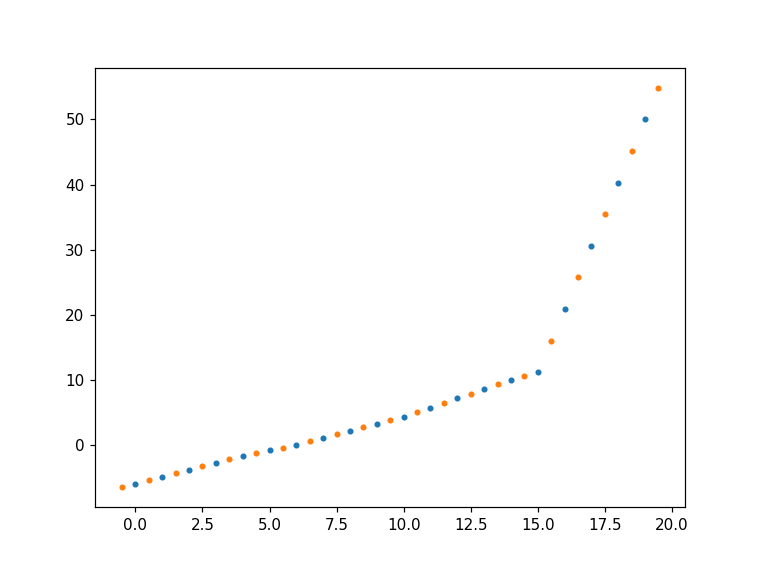

In [82]:
enax, enax_edges = make_valence_energy_axis(PAR, 20, min=-6, finemax=10, max=50)
plt.figure()
plt.plot(np.arange(len(enax)),enax,'.')
plt.plot(np.arange(len(enax_edges))-0.5,enax_edges,'.')